In [2]:
import pandas as pd
import matplotlib.pyplot as plt

We developed a variety of methods to trace field lines.  In earlier notebooks, we examined which methods equivalent and the differences between the non-equivalent methods.  In this notebook, we examine how sensitive the methods are two varying the start point for the field lines.

Below are the various methods that we implemented:

- BATSRUS SCIPY - Reads a BATSRUS file and determines field lines using SCIPY interpolator and solve_ivp
- BATSRUS SWMFIO - Same as BATSRUS SCIPY except it uses SWMFIO interpolator
- VTK SCIPY - Same as BATSRUS SCIPY, it uses SCIPY interpolator and solve_ivp, but it reads a VTK file and a VTK routine determines cell centers (Note 1).
- VTK SCIPY (CC) - Same as VTK SCIPY except the cell centers are read from the VTK file.
- VTK PARA - Reads VTK file and determines field lines with paraview.simple StreamTracer.  A completely different algorithm that does not use SCIPY or solve_ivp.

As demonstrated in the first notebook, BATSRUS SCIPY, VTK SCIPY, and VTK SCIPY (CC) are equivalent. So in examining sensitivity, we will examine only BATSRUS SCIPY, BATSRUS SWMFIO, and VTK PARA.

Note 1.  In a BATSRUS file, a grid is defined and the field is supplied at each grid point.  In a VTK file, the grid specifies the corners of the cells, and the field is supplied at each cell center.  The SWMFIO conversion from BATSRUS to VTK takes this into account, and will record the original BATSRUS grid, which correspond to the cell centers in the VTK file.  Thus, an algorithm to calculate field lines can determine the cell centers from the VTK grid or can use the cell centers stored in the VTK file.

In [3]:
# Read results from magfli using the various methods outlined above
results = pd.read_pickle("compare_methods.pkl")

The file that we read via the above python code contains the results from compare_methods.py.  That python script ran the same data through the methods described above.  In this analysis, we will focus on the three that should provide identical results - BATSRUS SCIPY, VTK SCIPY, and VTK SCIPY (CC).

Below we list the column headings in the pickle dataframe, which we named results.  The headings start with words like BATSRUS SCIPY, VTK SCIPY, ... to indicate which method was used to determine the field lines.  

Four field lines are calculated - both directions from the point (-3,0,0) and both directions from point (-10,0,0).  The (x,y,z) points for the first field line are in ...Line_0_x, ...Line_0_y, ...Line_0_z, the second in ...Line_1_x, ...Line_1_y, ...Line_1_z, etc.  So column BATSRUS SCIPY Field Line_1_y contains the y-coordinate for the second field line calculated with the BATSRUS SCIPY method.

The python script calculates the arc length of each field line.  The arc length at the first point in the field line is 0, the arc length at the second point is 0 plus the distance between the 1st and 2nd points, ..., the arc length at point n+1 is the total arc length to point n plus the distance between points n and n+1.  The columns containing the arc lengths end in ...Arc Length_0, Arc Length_1, etc., corresponding to the four field lines.

Also stored in the dataframe are the differences between the fieldlines generated by the various methods.  The python script is given a two field lines calculated with two different methods, along with the arc lengths for both field lines.  The python script marches down each field line.  At the first point on both field lines the scalar distance between them is always zero because both field lines start at the same point.  The python script marches a short distance down both field lines, $\delta$.  At this second point, the scalar distance between the two field lines is determined.  Repeat until the end of the field lines is reached. If the two methods that generated the fieldlines are identical, the scalar distances are always zero.  These results are recorded in columns with headings like BATSRUS SCIPY VTK SCIPY Delta_0, which contains the scalar distances between the first field lines from the BATSRUS SCIPY and the VTK SCIPY methods.  Similarly, BATSRUS SCIPY VTK SCIPY (CC) Delta_1 contains the scalar distances between the second field line from BATSRUS SCIPY and the VTK SCIPY (CC) methods. 

Other columns are included in the dataframe, but are ignored in this analysis.

In [4]:
# Here are the column headings in compare_methods.pkl
for i in results.columns:
    print(i)

BATSRUS SCIPY Field Line_0_x
BATSRUS SCIPY Field Line_0_y
BATSRUS SCIPY Field Line_0_z
BATSRUS SCIPY Field Line_1_x
BATSRUS SCIPY Field Line_1_y
BATSRUS SCIPY Field Line_1_z
BATSRUS SCIPY Field Line_2_x
BATSRUS SCIPY Field Line_2_y
BATSRUS SCIPY Field Line_2_z
BATSRUS SCIPY Field Line_3_x
BATSRUS SCIPY Field Line_3_y
BATSRUS SCIPY Field Line_3_z
BATSRUS SCIPY Arc Length_0
BATSRUS SCIPY Arc Length_1
BATSRUS SCIPY Arc Length_2
BATSRUS SCIPY Arc Length_3
BATSRUS SWMFIO Field Line_0_x
BATSRUS SWMFIO Field Line_0_y
BATSRUS SWMFIO Field Line_0_z
BATSRUS SWMFIO Field Line_1_x
BATSRUS SWMFIO Field Line_1_y
BATSRUS SWMFIO Field Line_1_z
BATSRUS SWMFIO Field Line_2_x
BATSRUS SWMFIO Field Line_2_y
BATSRUS SWMFIO Field Line_2_z
BATSRUS SWMFIO Field Line_3_x
BATSRUS SWMFIO Field Line_3_y
BATSRUS SWMFIO Field Line_3_z
BATSRUS SWMFIO Arc Length_0
BATSRUS SWMFIO Arc Length_1
BATSRUS SWMFIO Arc Length_2
BATSRUS SWMFIO Arc Length_3
VTK SCIPY Field Line_0_x
VTK SCIPY Field Line_0_y
VTK SCIPY Field Line_0

In the plot below, we compare field lines started at (-3,0,0) vs (-2.995,0,0) and at (-10,0,0) vs (-9.995,0,0).  The slight difference (0.005) in the start point should cause some perturbation in the field lines, so we expect to see some difference.  In most cases, we expect that difference to be small, although that does depend on the specific details of the magnetic field. Below are plots for BATSRUS SCIPY, and the difference in the pertubed field lines typically are of the order of 0.005.

<AxesSubplot:xlabel='BATSRUS SCIPY BATSRUS SCIPY (del) Delta Arc Lengths_3'>

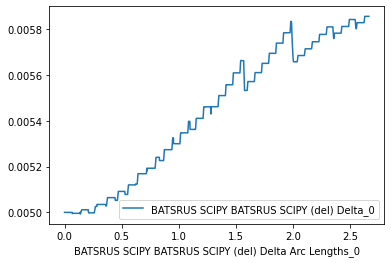

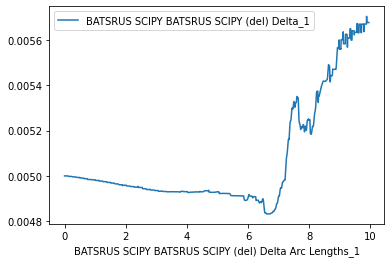

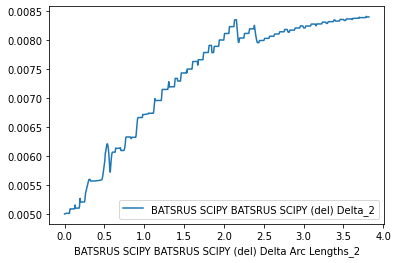

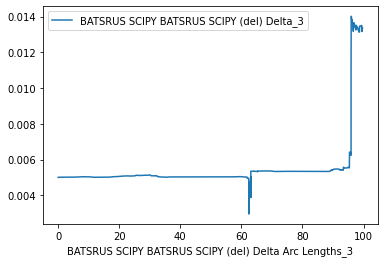

In [5]:
results.plot('BATSRUS SCIPY BATSRUS SCIPY (del) Delta Arc Lengths_0','BATSRUS SCIPY BATSRUS SCIPY (del) Delta_0')
results.plot('BATSRUS SCIPY BATSRUS SCIPY (del) Delta Arc Lengths_1','BATSRUS SCIPY BATSRUS SCIPY (del) Delta_1')
results.plot('BATSRUS SCIPY BATSRUS SCIPY (del) Delta Arc Lengths_2','BATSRUS SCIPY BATSRUS SCIPY (del) Delta_2')
results.plot('BATSRUS SCIPY BATSRUS SCIPY (del) Delta Arc Lengths_3','BATSRUS SCIPY BATSRUS SCIPY (del) Delta_3')

Below are the plots for BATSRUS SWMFIO, and the differences are similar in size to what we saw with BATSRUS SCIPY.  

An interesting point is that the fourth line exhibits behavior similar to our observations in the compare_methods_different notebook.  There, we saw a significant difference between the BATSRUS SCIPY and BATSRUS SWMFIO methods in the fourth field line at arc lengths greater than 60.  However, while we see similar behavior here, the difference is far smaller.

<AxesSubplot:xlabel='BATSRUS SWMFIO BATSRUS SWMFIO (del) Delta Arc Lengths_3'>

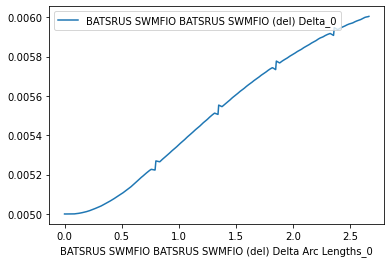

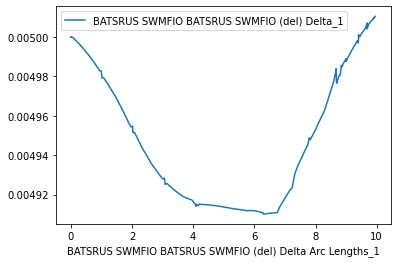

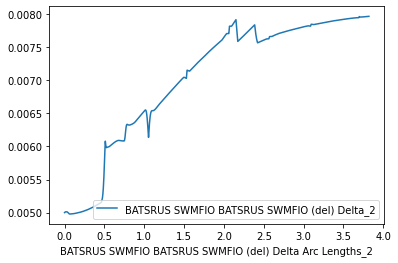

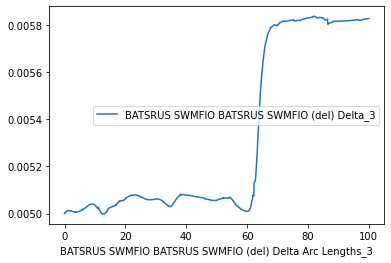

In [6]:
results.plot('BATSRUS SWMFIO BATSRUS SWMFIO (del) Delta Arc Lengths_0','BATSRUS SWMFIO BATSRUS SWMFIO (del) Delta_0')
results.plot('BATSRUS SWMFIO BATSRUS SWMFIO (del) Delta Arc Lengths_1','BATSRUS SWMFIO BATSRUS SWMFIO (del) Delta_1')
results.plot('BATSRUS SWMFIO BATSRUS SWMFIO (del) Delta Arc Lengths_2','BATSRUS SWMFIO BATSRUS SWMFIO (del) Delta_2')
results.plot('BATSRUS SWMFIO BATSRUS SWMFIO (del) Delta Arc Lengths_3','BATSRUS SWMFIO BATSRUS SWMFIO (del) Delta_3')

Lastly, we examine the VTK PARA.  The differences here are larger than we saw with either BATSRUS SCIPY or BATSRUS SWMFIO.  Furthermore, the VTK PARA differences tend to oscillate. 

Paraview.simple streamtracer documentation notes that streamtracer has two interpolators (https://www.paraview.org/Wiki/ParaView/Users_Guide/List_of_filters).  'Interpolator with Point Locator' and 'Interpolator with Cell Locator,' and the documentation notes that the point interpolator is faster, but not as robust as the cell interpolator.  To determine whether the cell interpolator would reduce the oscillation, it was applicated to this data, but the cell interpolator will not work with the BATSRUS data used in this analysis.

<AxesSubplot:xlabel='VTK PARA VTK PARA (del) Delta Arc Lengths_3'>

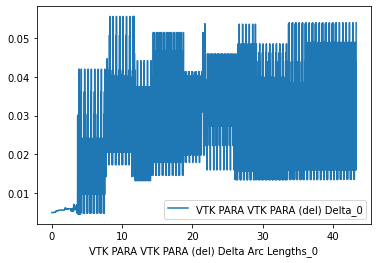

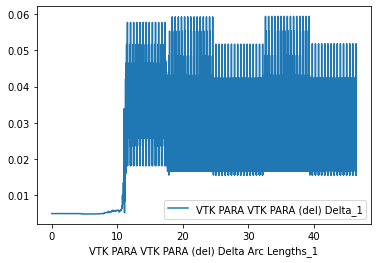

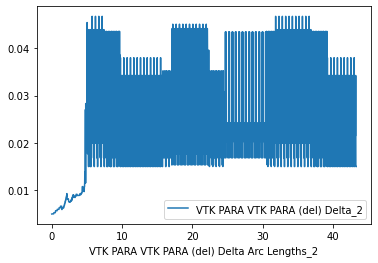

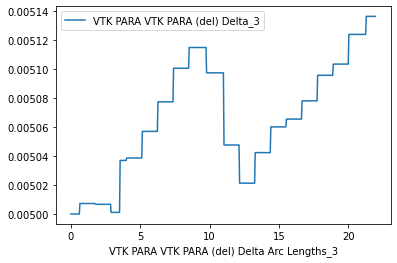

In [7]:
results.plot('VTK PARA VTK PARA (del) Delta Arc Lengths_0','VTK PARA VTK PARA (del) Delta_0')
results.plot('VTK PARA VTK PARA (del) Delta Arc Lengths_1','VTK PARA VTK PARA (del) Delta_1')
results.plot('VTK PARA VTK PARA (del) Delta Arc Lengths_2','VTK PARA VTK PARA (del) Delta_2')
results.plot('VTK PARA VTK PARA (del) Delta Arc Lengths_3','VTK PARA VTK PARA (del) Delta_3')